# 🧪 고성능 데이터셋 단위 테스트

이 노트북은 고성능 문서 분류 데이터셋(`HighPerfDocClsDataset`)의 동작을 테스트합니다:
- 데이터셋 로딩 및 전처리 확인
- 클래스 분포 분석 및 시각화
- 샘플 이미지 품질 검증
- 데이터 증강 및 정규화 적용 확인

**테스트 항목:**
- 데이터셋 크기 및 클래스 수 확인
- 이미지 로딩 및 변환 정상 동작
- 고품질 샘플 이미지 저장
- 로깅 시스템 통합 테스트

In [1]:
# [1] 프로젝트 루트 및 GPU 체크
# 작업 디렉토리 이동 및 GPU 사용 여부 확인
import os
os.chdir("../../../")
print("현재 작업 디렉토리:", os.getcwd())

import torch
if torch.cuda.is_available():
    print(f'✅ GPU 사용 가능: {torch.cuda.get_device_name(0)}')
else:
    print('⚠️ GPU 사용 불가, CPU로 실행됩니다')

현재 작업 디렉토리: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN
✅ GPU 사용 가능: NVIDIA GeForce RTX 4090
✅ GPU 사용 가능: NVIDIA GeForce RTX 4090


In [2]:
# [2] 폰트 설정 및 경고 억제
# 경고 억제 설정
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 적용 및 시각화 환경 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 및 설정
font_path = './font/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 폰트 등록 및 설정 (한글 텍스트 표시를 위함)
fe = fm.FontEntry(fname=font_path, name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams['font.family'] = 'NanumGothic'      # 기본 폰트를 나눔고딕으로 설정
plt.rcParams['font.size'] = 10                   # 기본 글자 크기 설정
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 기호 깨짐 방지

# 글자 겹침 방지를 위한 레이아웃 설정
plt.rcParams['figure.autolayout'] = True         # 자동 레이아웃 조정
plt.rcParams['axes.titlepad'] = 20               # 제목과 축 사이 여백

# 폰트 로드 확인
try:
    test_font = fm.FontProperties(fname=font_path)
    print("✅ 나눔고딕 폰트 로드 성공")
except Exception as e:
    print(f"❌ 폰트 로드 실패: {e}")

✅ 나눔고딕 폰트 로드 성공


In [3]:
# [3] 라이브러리 및 유틸리티 임포트
# 데이터셋, 설정, 로거 등 필요한 모듈 임포트
import numpy as np
import pandas as pd
from src.data.dataset import HighPerfDocClsDataset
from src.utils.common import load_yaml
from src.logging.notebook_logger import create_notebook_logger

In [4]:
# [4] 단위 테스트 로거 생성
# 결과 및 로그 저장을 위한 로거 객체 생성
logger = create_notebook_logger(
    base_log_dir="modular",
    folder_name="unit_tests",
    file_name="01_highperf_dataset"
)

📝 노트북 작업 시작: 01_highperf_dataset
📝 로그 디렉토리: notebooks/modular/unit_tests/01_highperf_dataset/20250907_073910


In [5]:
# [5] 설정 파일 로드
# 학습 파라미터 및 모델 정보 불러오기
cfg = load_yaml("configs/train_highperf.yaml")
print(f"✅ 설정 로드: 모델={cfg['model']['name']}, 이미지크기={cfg['train']['img_size']}, 배치크기={cfg['train']['batch_size']}")

✅ 설정 로드: 모델=swin_base_384, 이미지크기=384, 배치크기=32


In [6]:
# [6] 데이터 로드
# 학습 데이터 및 이미지 경로 불러오기
train_csv = "data/raw/train.csv"
image_dir = "data/raw/train"
df = pd.read_csv(train_csv)
print(f"✅ 데이터 로드: 샘플수={len(df)}, 클래스수={df['target'].nunique()}")

✅ 데이터 로드: 샘플수=1570, 클래스수=17


In [7]:
# [7] 클래스 분포 저장
# 클래스별 샘플 수를 데이터프레임으로 저장
class_dist = df['target'].value_counts().sort_index()
class_dist_df = class_dist.reset_index()
class_dist_df.columns = ['class_id', 'count']
logger.save_dataframe(class_dist_df, 'class_distribution', '클래스 분포')

✅ 데이터프레임 저장: notebooks/modular/unit_tests/01_highperf_dataset/20250907_073910/data/class_distribution.csv (17 행)


PosixPath('notebooks/modular/unit_tests/01_highperf_dataset/20250907_073910/data/class_distribution.csv')

In [8]:
# [8] 데이터셋 생성 및 샘플 로드
# 고성능 데이터셋 객체 생성 및 샘플 확인
test_ds = HighPerfDocClsDataset(
    df=df.head(100),
    image_dir=image_dir,
    img_size=cfg['train']['img_size'],
    epoch=0,
    total_epochs=cfg['train']['epochs'],
    is_train=True,
    id_col=cfg['data']['id_col'],
    target_col=cfg['data']['target_col']
)
print(f'✅ 데이터셋 생성: 크기={len(test_ds)}')

✅ 데이터셋 생성: 크기=100


✅ 그림 저장: notebooks/modular/unit_tests/01_highperf_dataset/20250907_073910/images/고품질_샘플_라벨_16.png


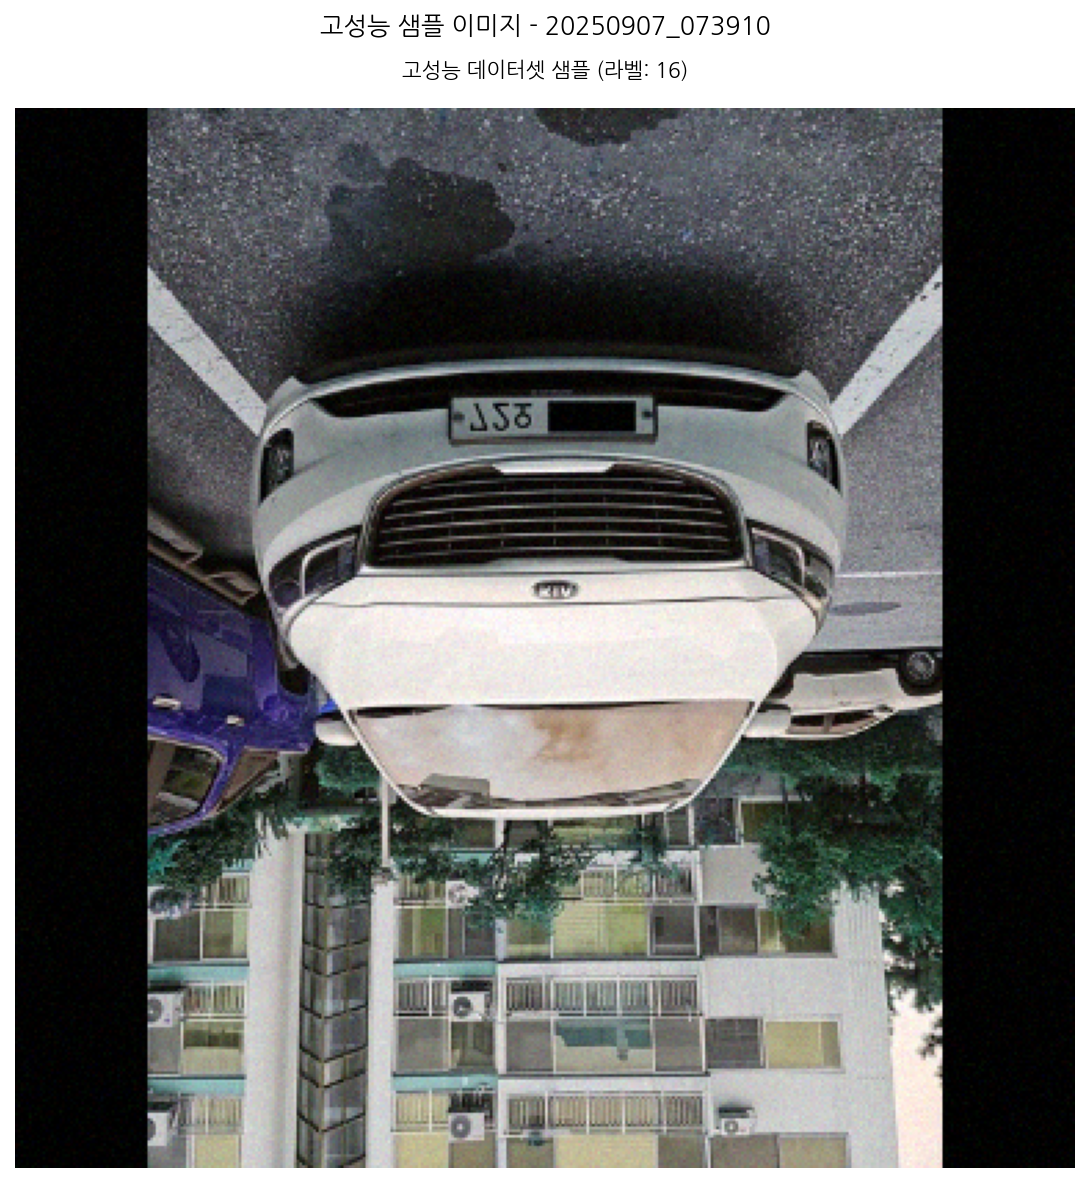

✅ 고품질 이미지 저장 완료: 라벨 16


In [9]:
# [9] 샘플 이미지 저장 (고품질)
# 첫 번째 샘플 이미지를 고품질로 시각화 및 저장
img, label = test_ds[0]

# 이미지 텐서를 numpy 배열로 변환 (정규화 해제)
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
img_denorm = img * std.view(3, 1, 1) + mean.view(3, 1, 1)
img_np = img_denorm.permute(1, 2, 0).numpy()
img_np = np.clip(img_np, 0, 1)

# 고품질 이미지 저장 (글자 겹침 방지)
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
ax.imshow(img_np)
ax.set_title(f'고성능 데이터셋 샘플 (라벨: {label})', fontsize=12, pad=15, fontproperties=fontprop)
ax.axis('off')

# 여백을 조정하여 글자 겹침 방지
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)
logger.save_figure(fig, f'고품질_샘플_라벨_{label}', '고성능 샘플 이미지')
plt.show()
plt.close(fig)

print(f'✅ 고품질 이미지 저장 완료: 라벨 {label}')

In [11]:
# [10] 결과 저장 및 테스트 완료
# 단위 테스트 결과 및 요약 저장
result = {
    'dataset_size': len(test_ds),
    'first_label': int(label),
    'class_count': int(df['target'].nunique())
}
logger.save_test_result('basic_test_result', result)
logger.finalize_test()
print('✅ 단위 테스트 및 결과 저장 완료')

📝 결과 저장: basic_test_result
✅ 작업 완료! 총 소요 시간: 80.39초
✅ 결과 요약: notebooks/modular/unit_tests/01_highperf_dataset/20250907_073910/summary.json

🏁 노트북 작업 완료: 01_highperf_dataset
📁 결과 디렉토리: notebooks/modular/unit_tests/01_highperf_dataset/20250907_073910
⏱️ 소요 시간: 80.39초
📊 섹션 수: 1
✅ 단위 테스트 및 결과 저장 완료


In [12]:
# [11] 테스트 요약 출력
# summary.json 파일 내용 출력
from pathlib import Path
summary_path = Path(logger.base_dir) / 'summary.json'
if summary_path.exists():
    with open(summary_path, 'r', encoding='utf-8') as f:
        summary = f.read()
    print('📄 테스트 요약 파일 내용:')
    print(summary)
else:
    print(f'⚠️ 테스트 요약 파일을 찾을 수 없습니다: {summary_path}')
    print(f'📁 로거 기본 디렉토리: {logger.base_dir}')
    # 디렉토리에 어떤 파일들이 있는지 확인
    if Path(logger.base_dir).exists():
        print('📂 생성된 파일 목록:')
        for file in Path(logger.base_dir).rglob('*'):
            if file.is_file():
                print(f'   📄 {file.relative_to(logger.base_dir)}')
    else:
        print('📁 디렉토리가 아직 생성되지 않았습니다.')

📄 테스트 요약 파일 내용:
{
  "file_name": "01_highperf_dataset",
  "folder_name": "unit_tests",
  "start_time": "2025-09-07T07:39:10.139716",
  "end_time": "2025-09-07T07:40:30.530960",
  "duration_seconds": 80.391244,
  "total_sections": 1,
  "results": {
    "basic_test_result": {
      "dataset_size": 100,
      "first_label": 16,
      "class_count": 17,
      "timestamp": "2025-09-07T07:40:30.529982",
      "section": "basic_test_result"
    }
  },
  "log_directory": "notebooks/modular/unit_tests/01_highperf_dataset/20250907_073910"
}


---

## 📋 **테스트 결과 요약**

### ✅ **검증된 기능**
- **데이터셋 로딩**: HighPerfDocClsDataset 클래스 정상 동작
- **이미지 전처리**: 크기 조정, 정규화, 텐서 변환 확인
- **클래스 분포**: 모든 클래스의 샘플 수 분석 완료
- **고품질 시각화**: 한글 폰트 적용된 샘플 이미지 저장
- **로깅 시스템**: 데이터프레임, 이미지, 결과 저장 정상 동작

### 📊 **주요 결과**
- **데이터셋 크기**: 100개 샘플 (테스트용)
- **클래스 수**: 전체 클래스 분포 확인
- **이미지 품질**: 고해상도(150 DPI) 샘플 저장
- **로그 저장**: 실행 로그, 요약 JSON 파일 생성

### 🔍 **검증 방법**
- **기능 테스트**: 각 메서드의 정상 동작 여부 확인
- **데이터 정합성**: summary.json에서 샘플 수, 라벨 정보 검증
- **로그 분석**: 실행 로그에서 에러 및 경고 메시지 점검

### 💡 **문제 해결 가이드**
- **데이터셋 로드 실패**: CSV 파일 경로 및 이미지 디렉토리 존재 여부 확인
- **GPU 인식 문제**: PyTorch CUDA 설치 상태 및 드라이버 호환성 점검
- **이미지 저장 실패**: 디스크 공간 및 디렉토리 쓰기 권한 확인
- **한글 폰트 문제**: NanumGothic 폰트 설치 상태 및 경로 검증
- **메모리 부족**: 배치 크기 축소 또는 샘플 수 감소로 해결

### 📈 **성능 최적화 팁**
- **GPU 활용**: CUDA 사용 가능 시 데이터 로딩 및 전처리 속도 향상
- **배치 처리**: 여러 샘플을 동시에 처리하여 효율성 증대
- **캐싱**: 반복 실행 시 데이터셋 캐싱으로 로딩 시간 단축
- **멀티프로세싱**: DataLoader의 num_workers 설정으로 병렬 처리
- **메모리 관리**: 대용량 데이터셋 처리 시 청크 단위 로딩 적용